<a href="https://colab.research.google.com/github/mahiyikes/Exploratory-Data-Analysis-Task5/blob/main/titanic_eda_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell: install packages (run once)
!pip install -q pandas numpy matplotlib seaborn scikit-learn statsmodels missingno kaggle
# missingno is optional but useful for missing-data visualizations

In [ ]:
from google.colab import files
uploaded = files.upload()  # This will open a file chooser

import io
import pandas as pd

# Read the uploaded train.csv
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
print("Loaded train.csv, shape:", df.shape)

# Look at the first few rows
df.head()

Saving train.csv to train.csv
Loaded train.csv, shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Imports & settings
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
sns.set(style="whitegrid")
# folders for saving
os.makedirs('/content/figures', exist_ok=True)

In [ ]:
# If you used Option A/B/C above, df should already be loaded.
# If not, load now (example):
# df = pd.read_csv('/content/data/train.csv')

print("Shape:", df.shape)
display(df.head())
display(df.info())
display(df.describe(include='all').T)

Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


,0
Cabin,687
Age,177
Embarked,2


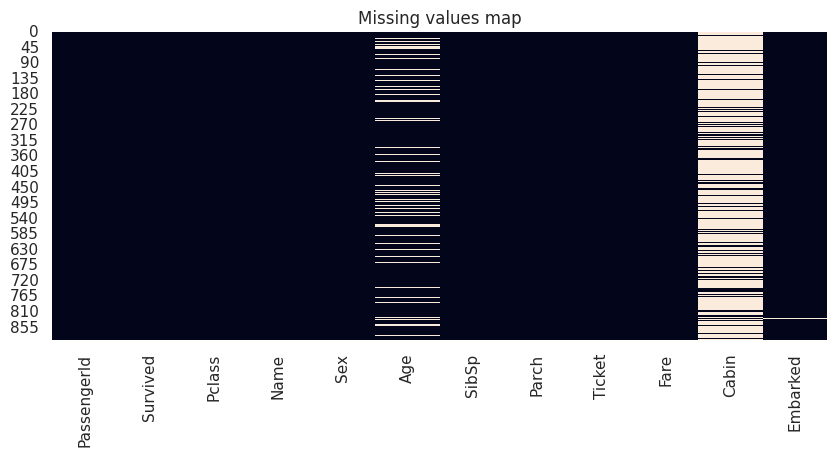

In [ ]:
# Missing summary
missing = df.isnull().sum().sort_values(ascending=False)
display(missing[missing>0])

# Simple heatmap of missingness
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing values map")
plt.savefig('/content/figures/missing_map.png', bbox_inches='tight')
plt.show()

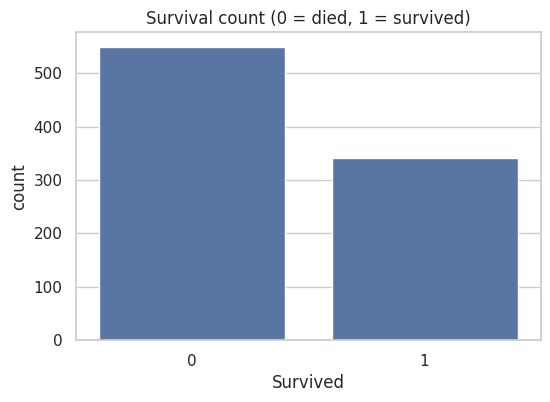

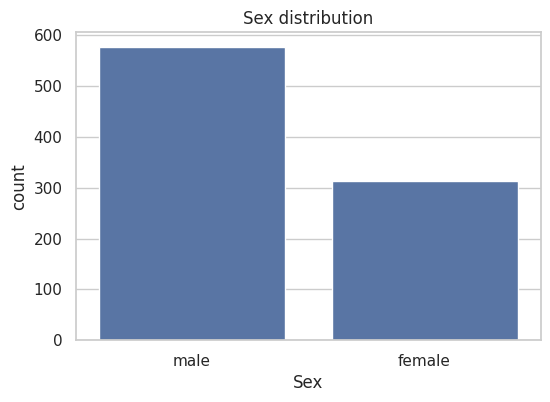

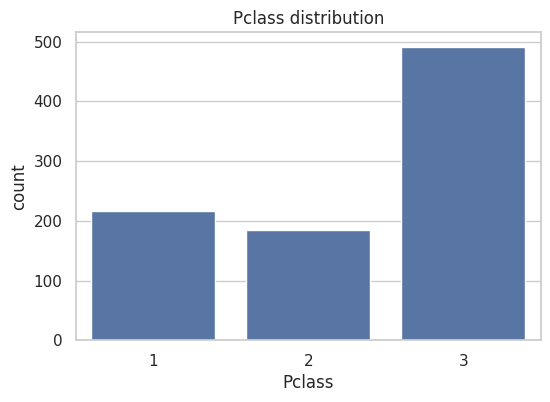

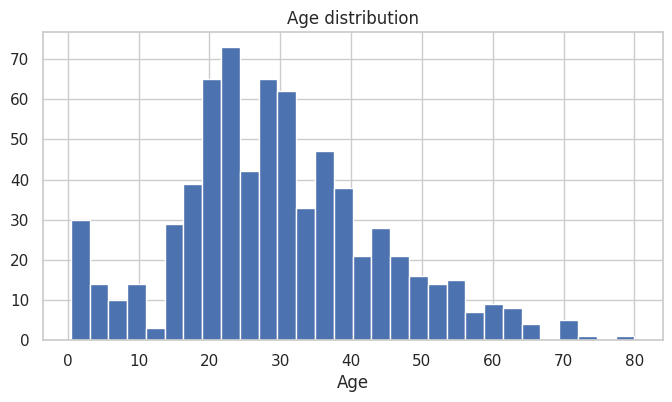

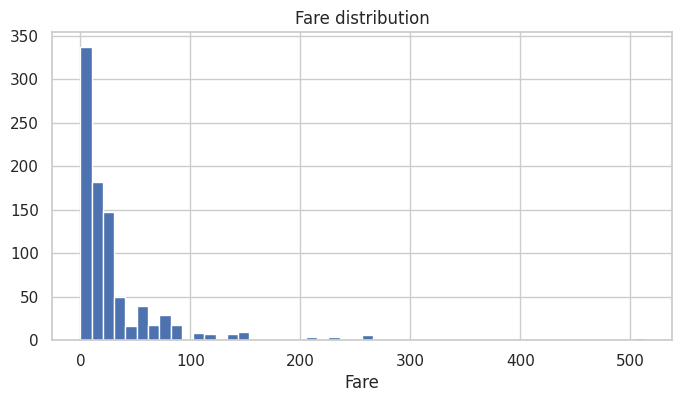

In [ ]:
# Survived
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title('Survival count (0 = died, 1 = survived)')
plt.savefig('/content/figures/survived_count.png', bbox_inches='tight')
plt.show()

# Sex
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df)
plt.title('Sex distribution')
plt.savefig('/content/figures/sex_count.png', bbox_inches='tight')
plt.show()

# Pclass
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=df)
plt.title('Pclass distribution')
plt.savefig('/content/figures/pclass_count.png', bbox_inches='tight')
plt.show()

# Age distribution
plt.figure(figsize=(8,4))
df['Age'].hist(bins=30)
plt.xlabel('Age')
plt.title('Age distribution')
plt.savefig('/content/figures/age_hist.png', bbox_inches='tight')
plt.show()

# Fare distribution (skewed)
plt.figure(figsize=(8,4))
df['Fare'].hist(bins=50)
plt.xlabel('Fare')
plt.title('Fare distribution')
plt.savefig('/content/figures/fare_hist.png', bbox_inches='tight')
plt.show()

,Survived
Sex,
female,0.742038
male,0.188908


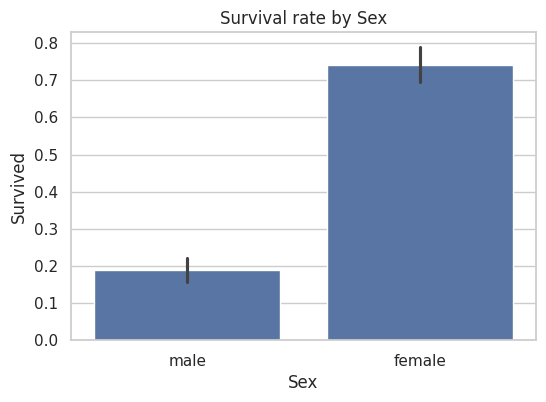

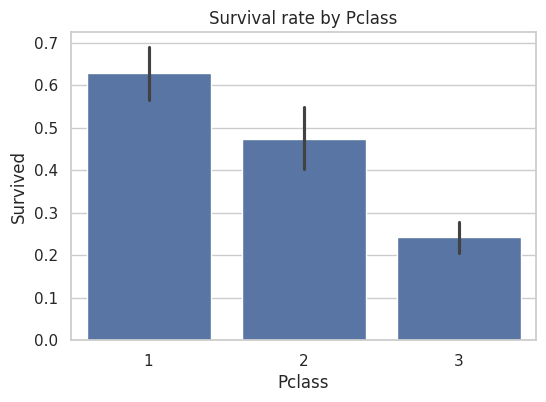

In [ ]:
# Survival rate by Sex
display(df.groupby('Sex')['Survived'].mean().sort_values(ascending=False))
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival rate by Sex')
plt.savefig('/content/figures/survival_by_sex.png', bbox_inches='tight')
plt.show()

# Survival rate by Pclass
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df, order=[1,2,3])
plt.title('Survival rate by Pclass')
plt.savefig('/content/figures/survival_by_pclass.png', bbox_inches='tight')
plt.show()

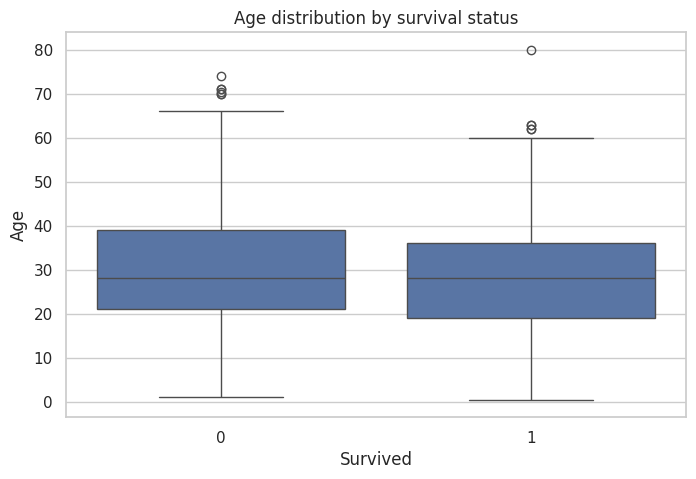

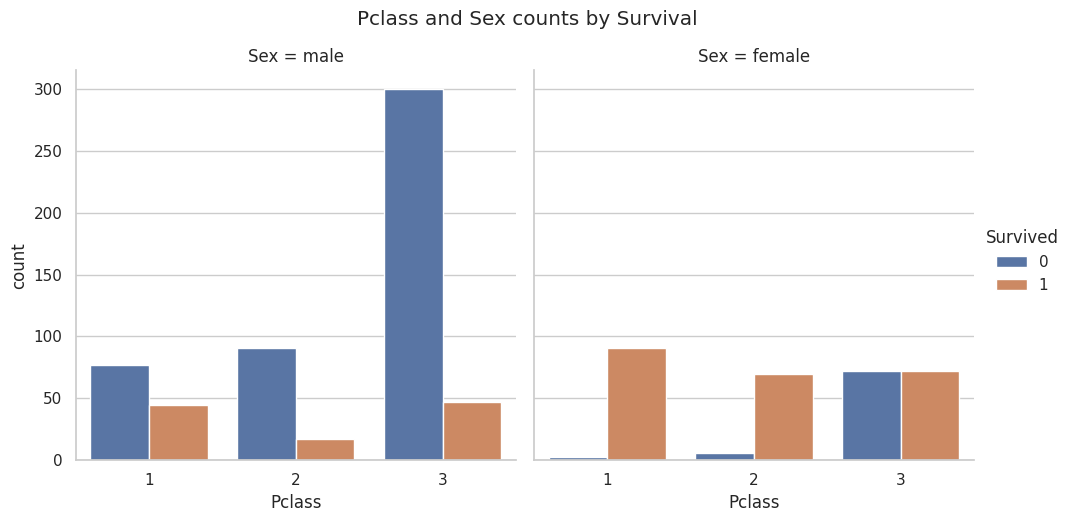

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age distribution by survival status')
plt.savefig('/content/figures/age_by_survived.png', bbox_inches='tight')
plt.show()

# Pclass × Sex × Survival counts
g = sns.catplot(x='Pclass', col='Sex', hue='Survived', data=df, kind='count')
g.fig.suptitle('Pclass and Sex counts by Survival', y=1.04)
plt.savefig('/content/figures/pclass_sex_survival.png', bbox_inches='tight')
plt.show()

In [ ]:
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False).str.strip()
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['Deck'] = df['Cabin'].astype(str).str[0].replace('n', np.nan)
display(df[['Name','Title','FamilySize','IsAlone','Cabin','Deck']].head())

,Name,Title,FamilySize,IsAlone,Cabin,Deck
0,"Braund, Mr. Owen Harris",Mr,2,0,NaN,NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,2,0,C85,C
2,"Heikkinen, Miss. Laina",Miss,1,1,NaN,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,2,0,C123,C
4,"Allen, Mr. William Henry",Mr,1,1,NaN,NaN


In [ ]:
# fill Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# Fare median
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Impute Age by median grouped by Sex & Pclass
df['Age'] = df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
df['Age'] = df['Age'].fillna(df['Age'].median())

# Check remaining nulls
display(df.isnull().sum().sort_values(ascending=False).head(10))

,0
Deck,687
Cabin,687
PassengerId,0
Survived,0
Sex,0
Age,0
Pclass,0
Name,0
Parch,0
SibSp,0


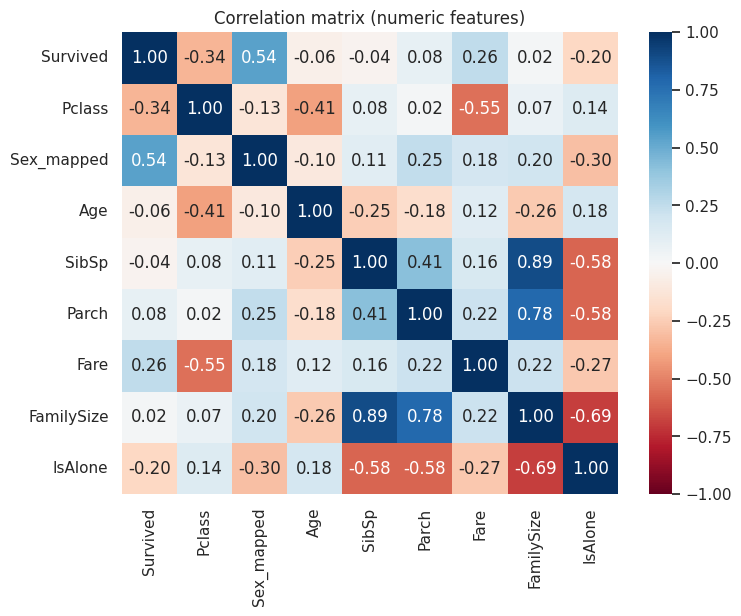

In [ ]:
# Map sex to numeric and take subset
df2 = df.copy()
df2['Sex_mapped'] = df2['Sex'].map({'male':0, 'female':1})
num_cols = ['Survived','Pclass','Sex_mapped','Age','SibSp','Parch','Fare','FamilySize','IsAlone']
corr = df2[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation matrix (numeric features)')
plt.savefig('/content/figures/corr_matrix.png', bbox_inches='tight')
plt.show()

In [ ]:
from statsmodels.tools.tools import add_constant
X = df2[['Pclass','Sex_mapped','Age','SibSp','Parch','Fare','FamilySize','IsAlone']]
X = add_constant(X)
vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
display(vif.sort_values('VIF', ascending=False))

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
4,SibSp,inf
7,FamilySize,inf
5,Parch,inf
8,IsAlone,2.155691
1,Pclass,1.858439
6,Fare,1.595980
3,Age,1.328940
2,Sex_mapped,1.147385
0,const,0.000000


In [ ]:
ct = pd.crosstab(df['Sex'], df['Survived'])
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct)
print("Chi2:", chi2, "p-value:", p)

Chi2: 260.71702016732104 p-value: 1.1973570627755645e-58


Fare skew: 4.787316519674893


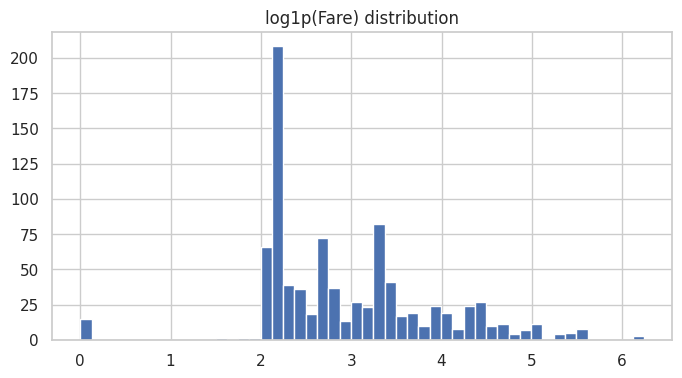

In [ ]:
# Check skew and optionally log-transform Fare
print("Fare skew:", df['Fare'].skew())
df['Fare_log1p'] = np.log1p(df['Fare'])
plt.figure(figsize=(8,4))
df['Fare_log1p'].hist(bins=50)
plt.title('log1p(Fare) distribution')
plt.savefig('/content/figures/fare_log_hist.png', bbox_inches='tight')
plt.show()

In [ ]:
rows = len(df)
survived = df['Survived'].sum()
summary = f"""
-- Quick Summary --
Total passengers (train): {rows}
Survived: {survived} ({survived/rows*100:.2f}%)

Key observations:
- Females show much higher survival rate than males.
- 1st class passengers survived more often than 3rd class.
- Age and family size have noticeable class/sex interactions.
- Cabin has many missing values — use Deck carefully.
"""
print(summary)
with open('/content/summary.txt', 'w') as f:
    f.write(summary)


-- Quick Summary --
Total passengers (train): 891
Survived: 342 (38.38%)

Key observations:
- Females show much higher survival rate than males.
- 1st class passengers survived more often than 3rd class.
- Age and family size have noticeable class/sex interactions.
- Cabin has many missing values — use Deck carefully.

